In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('mincpcap_cppp (1).csv')
df.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,1.330,1.330,1.330,1.330,1.330,1.330,1.330,1.330,1.330,...,10.7,10.9,11.2,11.4,11.7,12.0,12.3,12.6,12.8,13.2
1,Angola,0.779,0.781,0.785,0.789,0.791,0.795,0.799,0.802,0.806,...,19.8,20.2,20.6,21.0,21.4,21.9,22.3,22.7,23.2,23.6
2,Albania,0.919,0.921,0.924,0.927,0.929,0.932,0.935,0.937,0.940,...,56.7,57.4,58.0,58.6,59.2,59.8,60.5,61.1,61.7,62.3
3,Andorra,1.880,1.880,1.880,1.890,1.890,1.890,1.900,1.900,1.900,...,87.1,87.4,87.8,88.1,88.4,88.7,89.0,89.3,89.6,89.9
4,UAE,1.650,1.660,1.670,1.670,1.680,1.680,1.690,1.700,1.700,...,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,102.0,103.0


In [10]:
df_melted = df.melt(id_vars=['country'], var_name='Year', value_name='Income')
print(df_melted)

            country  Year  Income
0       Afghanistan  1800   1.330
1            Angola  1800   0.779
2           Albania  1800   0.919
3           Andorra  1800   1.880
4               UAE  1800   1.650
...             ...   ...     ...
58690         Samoa  2100  52.400
58691         Yemen  2100  10.000
58692  South Africa  2100  42.900
58693        Zambia  2100  17.300
58694      Zimbabwe  2100  24.200

[58695 rows x 3 columns]


In [12]:
df_melted['Year'] = pd.to_numeric(df_melted['Year'], errors='coerce')
print(df_melted['Year'])

0        1800
1        1800
2        1800
3        1800
4        1800
         ... 
58690    2100
58691    2100
58692    2100
58693    2100
58694    2100
Name: Year, Length: 58695, dtype: int64


In [14]:
income_stats = df_melted.groupby('Year')['Income'].agg(['mean', 'min', 'max'])
print(income_stats)

           mean    min     max
Year                          
1800   1.614672  0.193    6.75
1801   1.614128  0.193    6.63
1802   1.618810  0.193    7.00
1803   1.617892  0.193    6.85
1804   1.620667  0.193    7.17
...         ...    ...     ...
2096  54.404564  5.790  122.00
2097  54.898462  5.890  122.00
2098  55.377179  6.000  122.00
2099  55.883641  6.100  123.00
2100  56.366462  6.210  123.00

[301 rows x 3 columns]


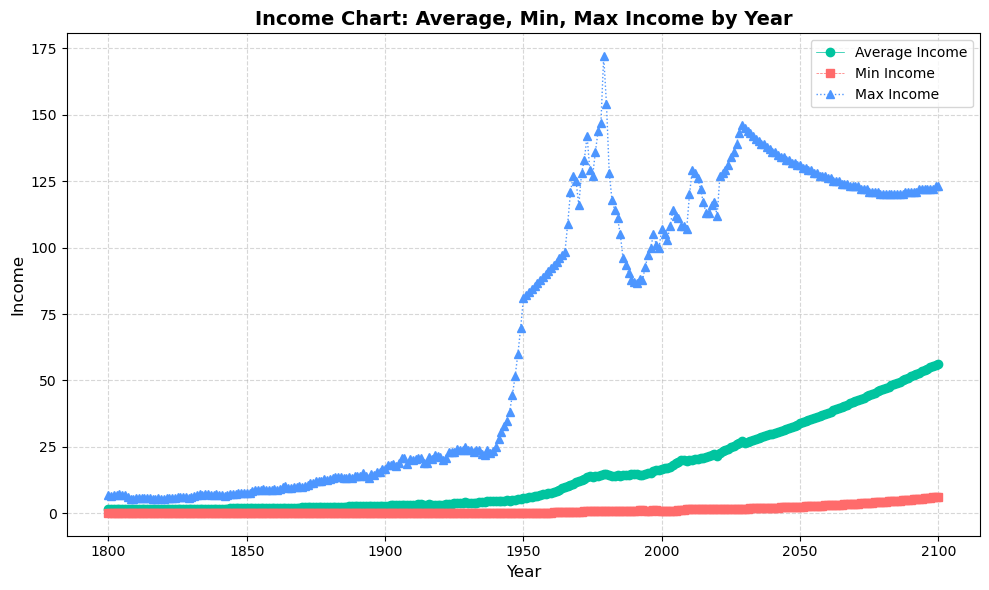

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(income_stats.index, income_stats['mean'], label='Average Income',
         marker='o', linestyle='-', color='#00C49F', linewidth=0.5) 

plt.plot(income_stats.index, income_stats['min'], label='Min Income',
         marker='s', linestyle='--', color='#FF6B6B', linewidth=0.5)

plt.plot(income_stats.index, income_stats['max'], label='Max Income',
         marker='^', linestyle=':', color='#4D96FF', linewidth=1) 
plt.title('Income Chart: Average, Min, Max Income by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()